#Email Spam Classification Project

<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">🚀 Email Spam Classification: Detecting Unwanted Messages 🚀</div>
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*mbFBPcPUJD-53v3h.png">
</div>


<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Life Cycle of the Project</div>


<a id="1"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">1. Introduction</div>


<span style="font-size: 14px; font-family: verdana; background-color: #F5F5F5; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  This notebook presents a step-by-step guide to building an efficient <span style="background-color: #FF5733; color:black  ; font-weight: bold; padding: 3px 6px; border-radius: 3px;">spam</span> classification model using the Enron dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted messages and ensure that your text mails experience is smoother and safer.
</span>


<a id="2"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">2. Problem Statement</div>


<span style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc;background-color: #F5F5F5; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
  The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either <span style="background-color: #FF5733; color:black; font-weight: bold; padding: 3px 6px; border-radius: 3px;">ham</span> or <span style="background-color: #FF5733; color: black ; font-weight: bold; padding: 3px 6px; border-radius: 3px;">spam</span>. We will use the Enron dataset, which consists of 6,531 Text tagged with their respective labels.
</span>


<a id="3"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3. Data Checks to Perform 🔍</div>

In [1]:
import kagglehub
wcukierski_enron_email_dataset_path = kagglehub.dataset_download('wcukierski/enron-email-dataset')
rtatman_deceptive_opinion_spam_corpus_path = kagglehub.dataset_download('rtatman/deceptive-opinion-spam-corpus')
ozlerhakan_spam_or_not_spam_dataset_path = kagglehub.dataset_download('ozlerhakan/spam-or-not-spam-dataset')
venky73_spam_mails_dataset_path = kagglehub.dataset_download('venky73/spam-mails-dataset')
balaka18_email_spam_classification_dataset_csv_path = kagglehub.dataset_download('balaka18/email-spam-classification-dataset-csv')
nitishabharathi_email_spam_dataset_path = kagglehub.dataset_download('nitishabharathi/email-spam-dataset')
rowhitswami_all_indian_companies_registration_data_1900_2019_path = kagglehub.dataset_download('rowhitswami/all-indian-companies-registration-data-1900-2019')
mfaisalqureshi_spam_email_path = kagglehub.dataset_download('mfaisalqureshi/spam-email')

print('Data source import complete.')


c:\Users\0911a\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3.1 Import Necessary Libraries</div>


In [2]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3.2 Load the Data</div>


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\0911a\.kaggle\kaggle.json'


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\0911a\.kaggle\kaggle.json'


import opendatasets as od
#Then you can use it like this:
od.download("https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset


100%|██████████| 8.90M/8.90M [00:02<00:00, 3.92MB/s]


In [1]:
#download opendatasets kaggle


import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?select=spam.csv'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 271kB/s]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from multiprocessing import Pool
from xgboost import XGBClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os





In [24]:
easy_ham_path = r'D:\PyCham_Projects\Eamil-classification\enron1-spamassasin-raw-dataset\Enron1+spamAssasin\ham\ham'
#hard_ham_path = '/kaggle/input/text-emails-extracted-by-ocr-dataset/OCR exracted text dataset/hard_ham_text/extracted_text_hard_ham'
spam_path = r'D:\PyCham_Projects\Eamil-classification\enron1-spamassasin-raw-dataset\Enron1+spamAssasin\spam\spam'

def get_data(path, label):
    file_contents = [open(os.path.join(path, file), encoding="ISO-8859-1").read() for file in os.listdir(path)]
    labeled_data = [{'text': content, 'label': label} for content in file_contents]
    return labeled_data



In [25]:
ham = get_data(easy_ham_path, 'ham') 
spam = get_data(spam_path, 'spam')

np.random.shuffle(ham)
np.random.shuffle(spam)

data = ham + spam
np.random.shuffle(data)

df = pd.DataFrame(data)
df

,text,label
0,From mrchservice311510@aol.com Mon Jun 24 17:...,spam
1,Subject: re : hi suzette\nthe secret on how po...,spam
2,From fork-admin@xent.com Wed Sep 11 13:49:34 ...,ham
3,Received: from mail.escorts.co.in (IDENT:root@...,spam
4,Subject: on call notes\nsaturday :\nmark from ...,ham
...,...,...
6526,Subject: eastrans nomination change effective ...,ham
6527,Subject: copanos changes\n- - - - - - - - - - ...,ham
6528,From fork-admin@xent.com Wed Oct 2 11:48:11 ...,ham
6529,Subject: anouncing a new player in the market ...,spam


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="4"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">4. Data Cleaning</div>


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.1 | Data Info</b></span>

In [26]:
df.describe()

,text,label
count,6531,6531
unique,6344,2
top,Subject: \n,ham
freq,16,3787


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6531 non-null   object
 1   label   6531 non-null   object
dtypes: object(2)
memory usage: 102.2+ KB


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.3 | Rename the Column</b></span>

In [28]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [29]:
df

,text,label
0,From mrchservice311510@aol.com Mon Jun 24 17:...,spam
1,Subject: re : hi suzette\nthe secret on how po...,spam
2,From fork-admin@xent.com Wed Sep 11 13:49:34 ...,ham
3,Received: from mail.escorts.co.in (IDENT:root@...,spam
4,Subject: on call notes\nsaturday :\nmark from ...,ham
...,...,...
6526,Subject: eastrans nomination change effective ...,ham
6527,Subject: copanos changes\n- - - - - - - - - - ...,ham
6528,From fork-admin@xent.com Wed Oct 2 11:48:11 ...,ham
6529,Subject: anouncing a new player in the market ...,spam


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.4 | Convert the target variable</b></span>

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [31]:
df

,text,label
0,From mrchservice311510@aol.com Mon Jun 24 17:...,1
1,Subject: re : hi suzette\nthe secret on how po...,1
2,From fork-admin@xent.com Wed Sep 11 13:49:34 ...,0
3,Received: from mail.escorts.co.in (IDENT:root@...,1
4,Subject: on call notes\nsaturday :\nmark from ...,0
...,...,...
6526,Subject: eastrans nomination change effective ...,0
6527,Subject: copanos changes\n- - - - - - - - - - ...,0
6528,From fork-admin@xent.com Wed Oct 2 11:48:11 ...,0
6529,Subject: anouncing a new player in the market ...,1


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.5 | Check Missing values</b></span>

In [32]:
#checking missing values
df.isnull().sum()

text     0
label    0
dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.6 | Check Duplicate values</b></span>

In [33]:
#check duplicate values
df.duplicated().sum()

np.int64(187)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.7 | Remove Duplicate values</b></span>

In [34]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [35]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.8 | Shape of the Dataset</b></span>

In [36]:
df.shape

(6344, 2)

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="5"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">5. EDA</div>


In [37]:
df['label'].value_counts()


label
0    3637
1    2707
Name: count, dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.1 | Percentage of Ham and Spam</b></span>

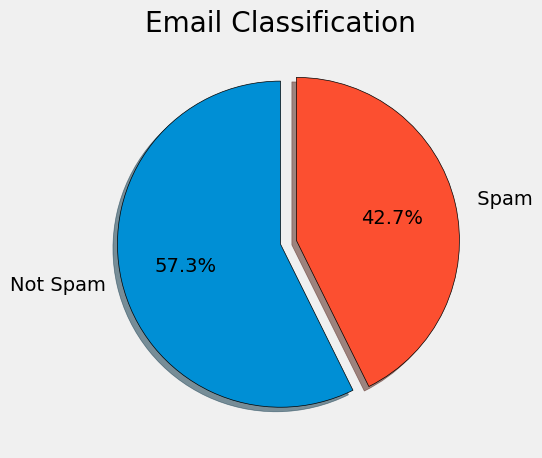

In [38]:
from matplotlib import pyplot as plt



plt.style.use("fivethirtyeight")



values = df['label'].value_counts()

slices = [values[0], values[1]]
labels = ['Not Spam', ' Spam']
explode = [ 0, 0.1, ]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Email Classification")
plt.tight_layout()
plt.show()

As you see to the graph the percentage of Not Spam is too high (57.3%) as compare to Spam(42.7%) messages percentage.

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.2 | Text Length and Structure Analysis</b></span>

In [ ]:
%pip install nltk
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['text'].apply(len)

0       1708
1        191
2       4434
3       2009
4       1067
        ... 
6526     188
6527     377
6528    4957
6529     698
6530    1238
Name: text, Length: 6344, dtype: int64

In [42]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [45]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0        329
1         39
2        760
3        414
4        230
        ... 
6526      38
6527     121
6528    1053
6529     139
6530     294
Name: text, Length: 6344, dtype: int64

In [46]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\1984334277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\1984334277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\1984334277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [47]:
df[['num_characters', 'num_words', 'num_sentence']]

,num_characters,num_words,num_sentence
0,1708,329,1
1,191,39,5
2,4434,760,12
3,2009,414,1
4,1067,230,13
...,...,...,...
6526,188,38,1
6527,377,121,4
6528,4957,1053,21
6529,698,139,18


In [48]:

df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,6344.000000,6344.000000,6344.000000
mean,3172.445145,654.759773,15.215479
std,7612.949946,1355.401256,28.395976
min,10.000000,2.000000,1.000000
25%,371.000000,80.750000,4.000000
50%,1108.000000,245.500000,8.000000
75%,3241.750000,637.250000,16.000000
max,300734.000000,19640.000000,691.000000


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.3 | Summary Statistics for Legitimate Messages</b></span>

Statistical description of Not Spam

In [49]:
#ham
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3637.000000,3637.000000,3637.000000
mean,2908.200440,621.604619,14.201540
std,8833.116298,1533.430514,25.968751
min,17.000000,3.000000,1.000000
25%,288.000000,64.000000,4.000000
50%,755.000000,182.000000,7.000000
75%,2594.000000,526.000000,15.000000
max,300734.000000,19640.000000,574.000000


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.4 | Summary Statistics for Spam Messages</b></span>

Statistical description of Spam

In [50]:
#spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,2707.000000,2707.000000,2707.000000
mean,3527.472109,699.305504,16.577761
std,5549.317958,1069.242049,31.316084
min,10.000000,2.000000,1.000000
25%,516.000000,109.000000,4.000000
50%,1935.000000,347.000000,9.000000
75%,4292.500000,850.500000,17.000000
max,90427.000000,14645.000000,691.000000


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.5 | Character Length Distribution for Legitimate and Spam Messages</b></span>

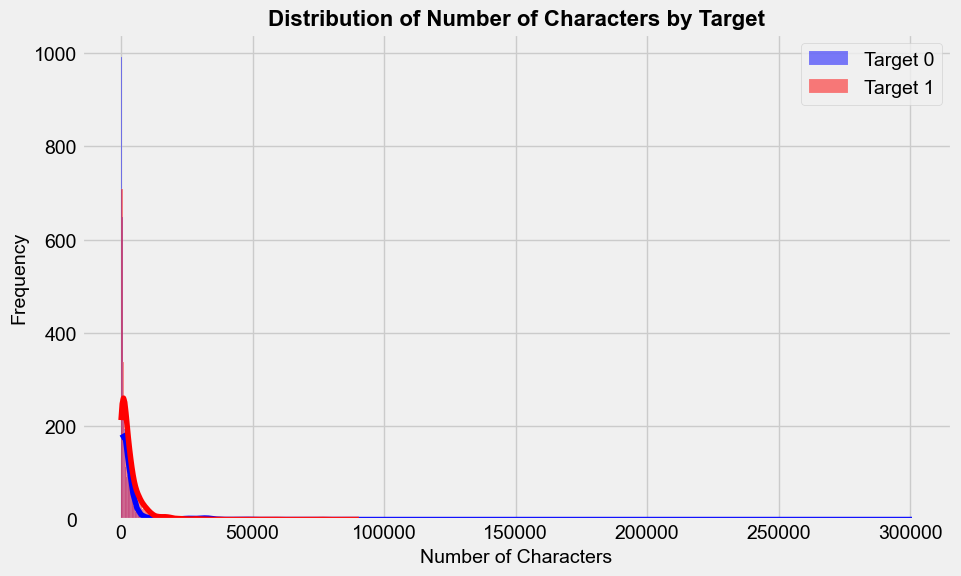

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.6 | Word Count Distribution for Legitimate and Spam Messages</b></span>

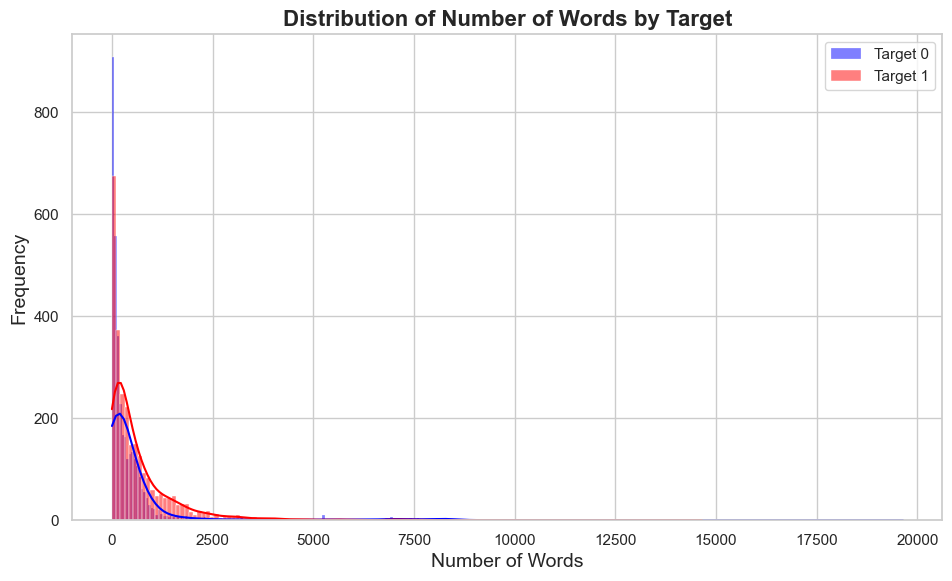

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.7 | Pairplot for Data Visualization</b></span>

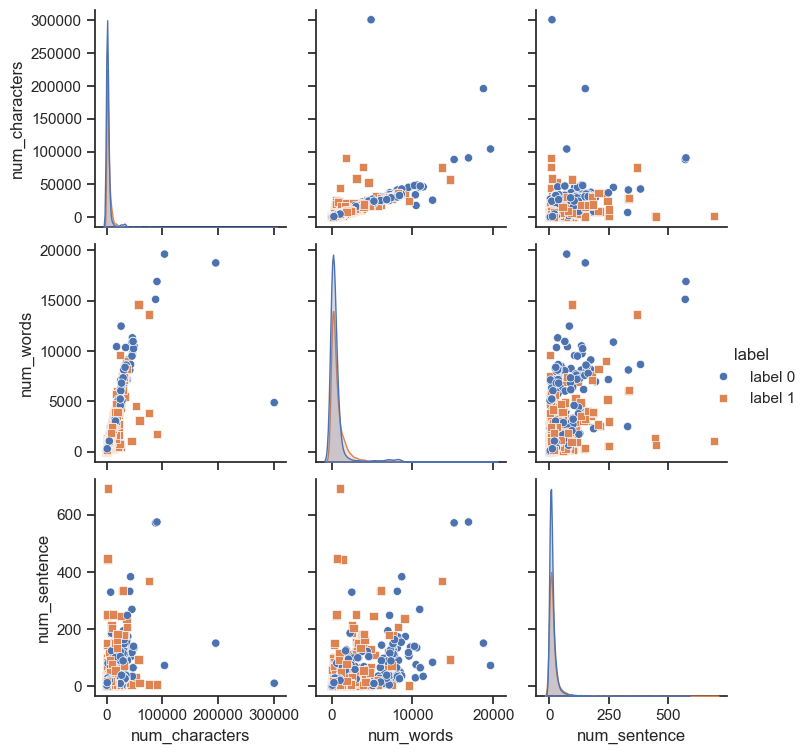

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='label', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot

plt.subplots_adjust(top=1)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('label')
for t, l in zip(g._legend.texts, ["label 0", "label 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5.8 | Coorelation</b></span>

In [54]:
df[['num_characters', 'num_words', 'num_sentence']].corr()

,num_characters,num_words,num_sentence
num_characters,1.000000,0.825618,0.444401
num_words,0.825618,1.000000,0.532555
num_sentence,0.444401,0.532555,1.000000


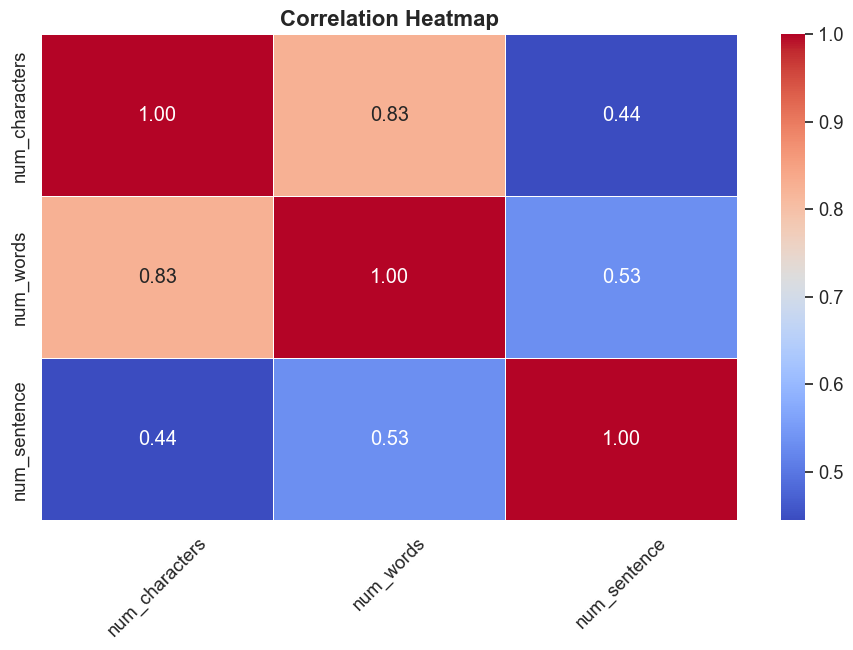

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[[ 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="6"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">6. Data Preprocessing</div>


In [56]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

nltk.download('punkt') # Download punkt for tokenization
nltk.download('stopwords') # Download stopwords corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0911a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


checking  the fuction

In [57]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.1 | Creating a New Column: 'transformed_text'</b></span>

In [58]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [59]:
df

,text,label,num_characters,num_words,num_sentence,transformed_text
0,From mrchservice311510@aol.com Mon Jun 24 17:...,1,1708,329,1,mrchservice311510 mon jun 24 2002 mrchservic s...
1,Subject: re : hi suzette\nthe secret on how po...,1,191,39,5,subject hi suzett secret porn star grew big di...
2,From fork-admin@xent.com Wed Sep 11 13:49:34 ...,0,4434,760,12,wed sep 11 2002 yyyi receiv localhost jalapeno...
3,Received: from mail.escorts.co.in (IDENT:root@...,1,2009,414,1,receiv ident root esmtp id g6phkbe06080 ka thu...
4,Subject: on call notes\nsaturday :\nmark from ...,0,1067,230,13,subject call note saturday mark aquilla short ...
...,...,...,...,...,...,...
6526,Subject: eastrans nomination change effective ...,0,188,38,1,subject eastran nomin chang effect 9 13 00 del...
6527,Subject: copanos changes\n- - - - - - - - - - ...,0,377,121,4,subject copano chang forward ami chokshi corp ...
6528,From fork-admin@xent.com Wed Oct 2 11:48:11 ...,0,4957,1053,21,wed oct 2 2002 yyyi receiv localhost jalapeno ...
6529,Subject: anouncing a new player in the market ...,1,698,139,18,subject anounc new player market qbbcpryhrv tr...


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.2 | Word Cloud for Spam Messages</b></span>

In [ ]:
%pip install wordcloud
from wordcloud import WordCloud

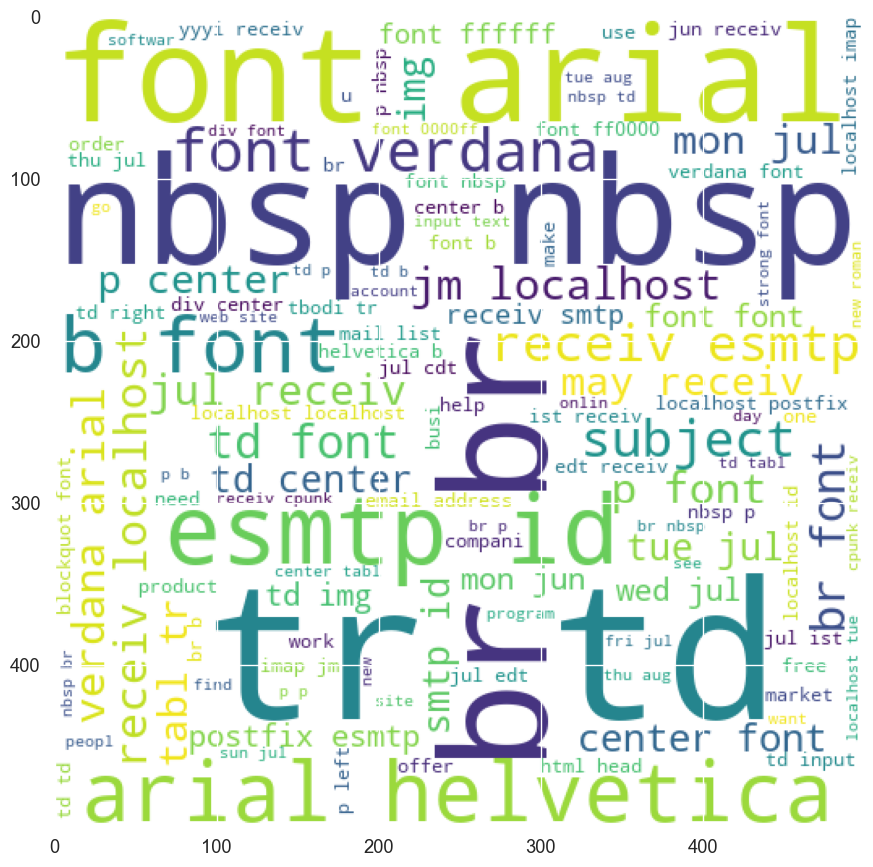

In [61]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,10))
plt.imshow(spam_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.2 | Word Cloud for Not spam Messages</b></span>

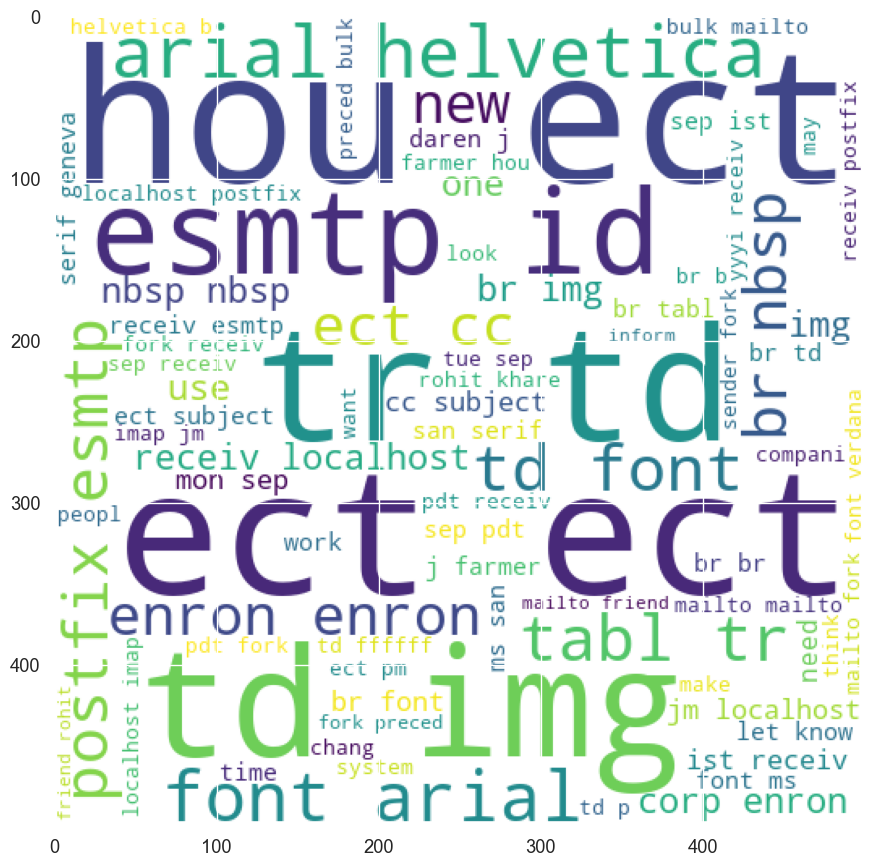

In [62]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,10))
plt.imshow(ham_wc)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.3 | Find top 30 words of spam</b></span>

In [64]:
spam_corpos = []
for sentence in df[df['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_corpos.append(word)

# Define the file path
file_path = r'D:\PyCham_Projects\Eamil-classification\spam_words.txt'

# Save spam words to a text file
with open(file_path, 'w') as f:
    for word in spam_corpos:
        f.write(word + '\n')

In [65]:
spam_corpos

['mrchservice311510',
 'mon',
 'jun',
 '24',
 '2002',
 'mrchservic',
 'sat',
 'may',
 '11',
 '2002',
 'receiv',
 'esmtp',
 'id',
 'g4b02ye22411',
 'jm',
 'sat',
 '11',
 'may',
 '2002',
 'receiv',
 'esmtp',
 'id',
 'g4b02sd00973',
 'jm',
 'sat',
 '11',
 'may',
 '2002',
 'receiv',
 'esmtp',
 'id',
 'g4anltcq010777',
 'sat',
 '11',
 'may',
 '2002',
 'receiv',
 'mercuri',
 '11',
 'may',
 '02',
 'receiv',
 'spooldir',
 'asta',
 'mercuri',
 '10',
 'may',
 '02',
 'receiv',
 'mercuri',
 '10',
 'may',
 '02',
 'mrchservic',
 'mrchservice311510',
 'yyyi',
 'cc',
 'yyyi',
 'yyyi',
 'yyyi',
 'yyyi',
 'jm',
 'jm',
 'subject',
 'merchant',
 'info',
 '3115107654333222221111',
 'date',
 'fri',
 '10',
 'may',
 '2002',
 '109dd3f31ba',
 'html',
 'mom',
 'dad',
 'ccept',
 'c',
 'grandma',
 'grandpa',
 'redit',
 'c',
 'aunt',
 'kate',
 'ard',
 'everyon',
 'uncl',
 'pprove',
 'p',
 'c',
 'hi',
 'famili',
 'redit',
 'ch',
 'love',
 'eck',
 'p',
 'p',
 '3115107654333222221111',
 'subject',
 'hi',
 'suzett',
 '

In [66]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_corpos).most_common(30))
filter_df

,0,1
0,font,14439
1,br,13059
2,http,8786
3,2002,8247
4,nbsp,8051
5,td,7881
6,receiv,6776
7,b,5445
8,p,5006
9,arial,4909


C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


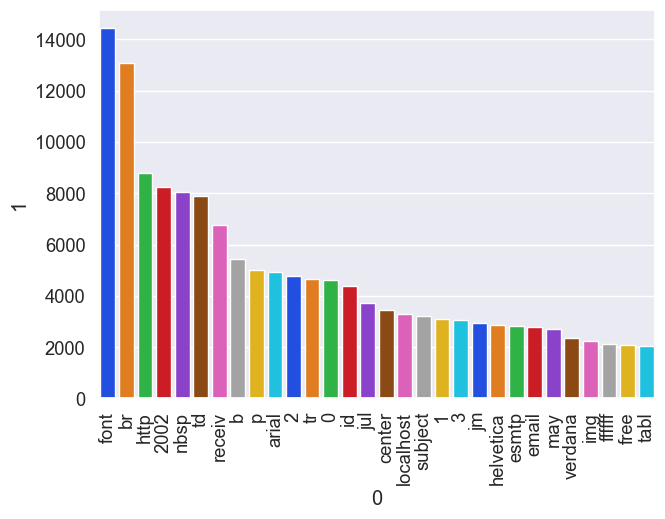

In [67]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6.4 | Find top 30 words of Not spam Messages</b></span>

In [68]:
ham_carpos = []
for sentence in df[df['label'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [69]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

C:\Users\0911a\AppData\Local\Temp\ipykernel_20132\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


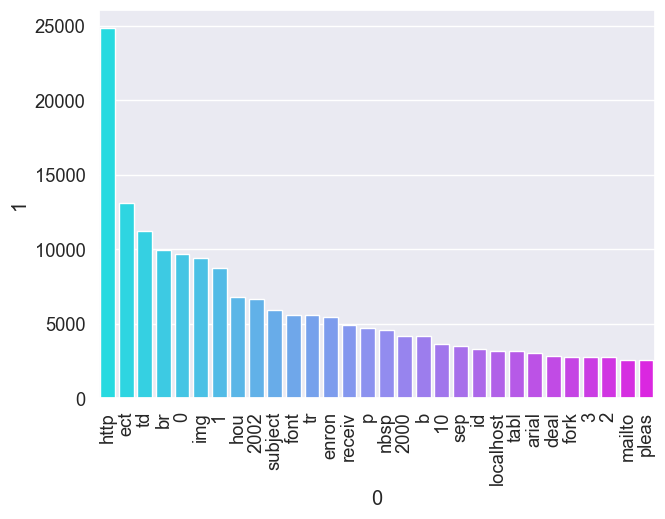

In [70]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="7"></a>
<div style="text-align: center; background: linear-gradient(to right, #FF00CC, #660066); font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">7. Model Building</div>


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.1 | Initializing CountVectorizer and TfidfVectorizer</b></span>

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.2 | Dependent and Independent Variable</b></span>

In [72]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [73]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
y

array([1, 1, 0, ..., 0, 1, 0])

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.3 | Split into Train and Test Data</b></span>

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.4 | Import the Models</b></span>

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.5 | Initialize the Models</b></span>

In [78]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
#mnb = MultinomialNB()
#dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.6 | Dictionary of the Models</b></span>

In [79]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    #'NB': mnb,
    #'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

:> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7.7 |Train the Models</b></span>

In [80]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

<a id="8"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">8. Evaluate the Models</div>


In [81]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9637509850275807
Precision:  0.9560632688927944

For:  KNN
Accuracy:  0.9629629629629629
Precision:  0.9709090909090909

For:  LR
Accuracy:  0.9613869188337274
Precision:  0.9372881355932203

For:  RF
Accuracy:  0.9739952718676123
Precision:  0.9539249146757679


c:\Users\0911a\anaconda3\envs\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.9487785657998424
Precision:  0.9251700680272109

For:  Bgc
Accuracy:  0.9621749408983451
Precision:  0.9449225473321858

For:  ETC
Accuracy:  0.9810874704491725
Precision:  0.9671848013816926

For:  GBDT
Accuracy:  0.9479905437352246
Precision:  0.9110378912685337

For:  xgb
Accuracy:  0.970843183609141
Precision:  0.9536082474226805


In [93]:
model1=etc.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy , precision

(0.9810874704491725, np.float64(0.9671848013816926))

In [94]:
model=rfc.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy , precision

(0.9739952718676123, np.float64(0.9539249146757679))

In [95]:
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier

# Save the model
dump(model, "model.pkl")



['model.pkl']

In [90]:
dump(X, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [96]:
model = load("model.pkl")
model


RandomForestClassifier(n_estimators=50, random_state=2)

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

<a id="9"></a>
<div style="text-align: center; background:  #FF00CC; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">9. Conclusion</div>


In [ ]:
# Conclusion
print("""
Conclusion:
1. Random Forest (RF) has the highest accuracy (0.976) and a high precision (0.962), indicating a robust performance.
2. Extra Trees Classifier (ETC) and Balanced Bagging Classifier (Bgc) also have high accuracy and precision, performing well overall.
3. Decision Tree (DT) has the lowest accuracy (0.837) and precision (0.727), suggesting it may be less reliable compared to other models.
4. Models like KNN, SVC, and XGBoost have balanced and relatively high scores, indicating consistent performance.
""")



Conclusion:
1. Random Forest (RF) has the highest accuracy (0.976) and a high precision (0.962), indicating a robust performance.
2. Extra Trees Classifier (ETC) and Balanced Bagging Classifier (Bgc) also have high accuracy and precision, performing well overall.
3. Decision Tree (DT) has the lowest accuracy (0.837) and precision (0.727), suggesting it may be less reliable compared to other models.
4. Models like KNN, SVC, and XGBoost have balanced and relatively high scores, indicating consistent performance.

